### 一元函数
函数f以x为唯一输入值,输出值为以y=f(x),则函数是一元函数.函数的输入值x构成的集合叫做**定义域**,函数输出值y构成的集合叫作**值域**

常用的函数分为代数函数和超越函数
- 代数函数:通过常数与自变量相互之间有限次的加,减,乘,除有理指数幂和开方等运算构成的函数
- 超越函数:超出代数函数范围的函数,对数函数,指数函数,三角函数

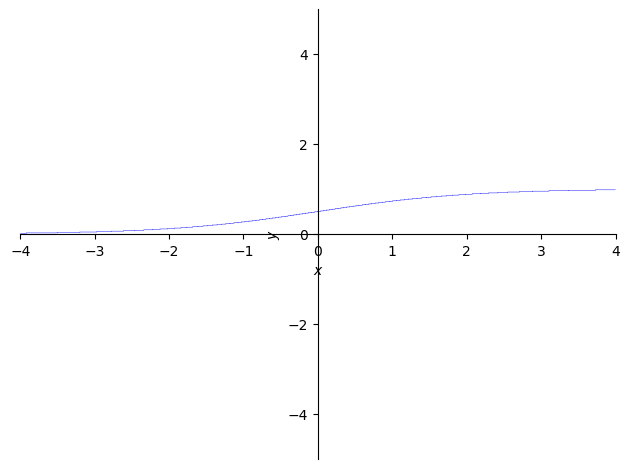

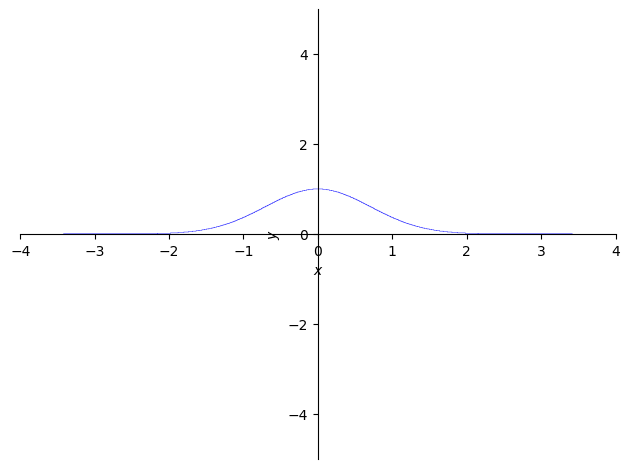

In [10]:
from sympy import plot_implicit,exp,symbols,Eq
import numpy as np

x,y=symbols('x,y')

expr=Eq(1/(1+exp(-x)),y)

plot_implicit(expr,[x,-4,4])

gaus=Eq(np.e**(-x**2),y)

plot_implicit(gaus,[x,-4,4])


### 一元函数性质

1. 奇偶性
    偶函数:关于纵坐标对称,`f(x)=f(-x)`
    奇函数:关于原点对称,`f(-x)=-f(x)`

2. 连续性
    连续函数(continuos function)是指当函数y=f(x)自变量x变化很小时,所引起的因变量y的变化也很小,即没有函数值突变.与之相对的就是不连续函数(discontinous function)

3. 单调性
    单调递增和单调递减
    > is_decreasing()来判断符号函数单调性

4. 周期性
    函数f中不同位置x满足`f(x+T)=f(x)`则函数是周期函数,T为周期,典型的三角函数

5. 凹凸性(与国内教程相反)
    - 凹函数(concave function)最大值:$f( \frac{a+b}{2} ) > \frac{f(a)+f(b)}{2}$
    - 凸函数(convex function)最小值:$f( \frac{a+b}{2} ) < \frac{f(a)+f(b)}{2}$

6. 反函数(inverse function)
    $x=f^-(y)$的定义域,值域分别是y=f(x)的值域和定义域,两者关系$ f^- (f(x))=x$,他们的图像关于y=x对称

7. 隐函数
    隐函数由隐式方程所隐含定义的函数,比如隐式方程F(x,y)=0描述x和y两者关系

变化率和面积

在几何角度,函数上某一点切线的斜率正是函数的变化率,微积分中这个函数的变化率叫导数(derivative)


In [3]:
from sympy import Interval,is_decreasing,oo
from sympy.abc import x,y

expr=x**2+2
print(is_decreasing(expr,Interval(-1,+oo)))

print(is_decreasing(-expr,Interval(1,3)))

False
True


### 二元函数
有两个自变量的函数叫二元函数(bivariate function),如y=f(x,y).二元函数的可视化一般都是借助三维坐标系

### 降维
二元函数的两种可视化工具-刨面线,等高线.刨面线的降维相当于沿着横轴或纵轴切一刀,关注截面曲线变化的趋势.

### 等高线(contour line)
等高线可以把f(x,y)曲面看成一座山峰,函数值越大,相当于山峰越高.三维等高线和平面等高线是研究二元函数重要手段之一,曲面某一条等高线就是函数值f(x,y)相同,即f(x,y)=c相邻点连接构成曲面

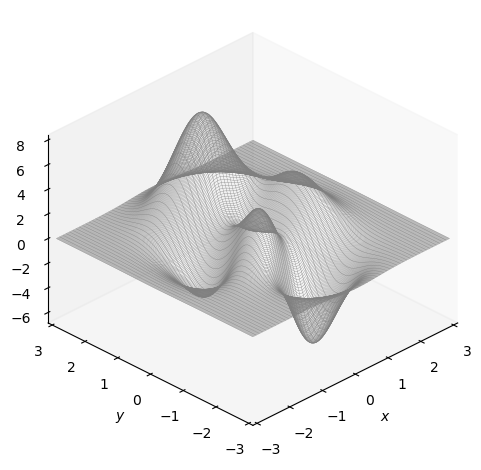

In [7]:
from sympy import lambdify,exp,simplify
from sympy.abc import x,y
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

num=301 # mesh grids
x_array=np.linspace(-3,3,num=num)
y_array=np.linspace(-3,3,num=num)

xx,yy=np.meshgrid(x_array,y_array)

plt.close('all')

f_xy=3*(1-x)**2 * exp(-(x**2) - (y+1)**2 )\
    -10*(x/5 - x**3 -y**5)*exp(-x**2-y**2)\
    -1/3*exp(-(x+1)**2 - y**2)

f_xy_fcn=lambdify([x,y],f_xy)
f_xy_zz=f_xy_fcn(xx,yy)

fig,ax=plt.subplots(subplot_kw={'projection':'3d'})

ax.plot_wireframe(xx,yy,f_xy_zz,color=[0.5,0.5,0.5],
                  rstride=1, # 代表网格线之前垂直距离步长
                  cstride=5, # 代表每个色彩更新的步长
                  linewidth=0.25)

# orthographic 正焦投影
ax.set_proj_type('ortho')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

ax.set_xlim(xx.min(),xx.max())
ax.set_ylim(yy.min(),yy.max())

# 设置三维坐标系视角(elev,azim,roll)
# elevation 仰角;azimuth 方位角;roll 滚动角
ax.view_init(azim=-135,elev=30)
ax.grid(False)
# 自动调整布局
plt.tight_layout()
plt.show()

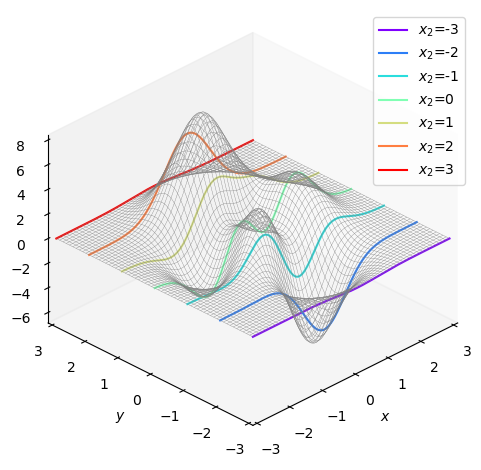

In [11]:
fig,ax=plt.subplots(subplot_kw={'projection':'3d'})

ax.plot_wireframe(xx,yy,f_xy_zz,color=[0.5,0.5,0.5]
                  ,rstride=5,cstride=5,linewidth=0.25)
colors=plt.cm.rainbow(np.linspace(0,1,num=7))

i=0
for b in [-3,-2,-1,0,1,2,3]:
    f_xy_b=f_xy.subs(y,b)
    f_xy_b_fcn=lambdify([x],f_xy_b)
    f_xy_b_zz=f_xy_b_fcn(x_array)
    
    #在上面的基础上切线
    ax.plot(x_array,y_array*0+b,f_xy_b_zz,color=colors[i,:],label=f'$x_2$={b}')

    i=i+1
plt.legend()
ax.set_proj_type('ortho')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

ax.set_xlim(xx.min(),xx.max())
ax.set_ylim(yy.min(),yy.max())
ax.view_init(azim=-135,elev=30)
plt.tight_layout()
ax.grid(False)
plt.show()

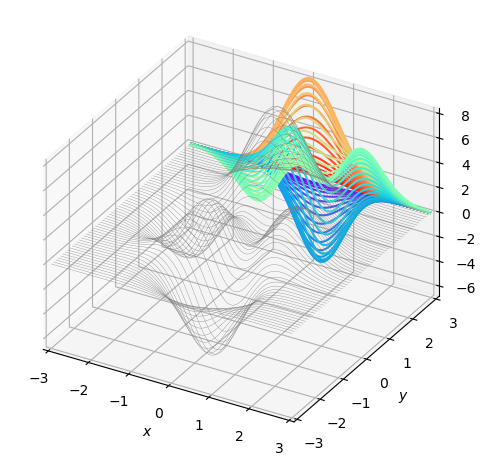

In [12]:
fig,ax=plt.subplots(subplot_kw={'projection':'3d'})

ax.plot_wireframe(xx,yy,f_xy_zz,color=[0.5,0.5,0.5]
                  ,rstride=5,cstride=0
                  ,linewidth=0.25)
ax.contour(xx,yy,f_xy_zz,levels=60,
           zdir='y', # 指定等高线图的z方向,默认z,沿着z方向绘制等高线,通过设置x,y改变方向
           offset=yy.max(),# 用于指定等高线图在x,y平面上偏移量,默认情况为0
           cmap='rainbow')

ax.set_proj_type('ortho')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)')

ax.set_xlim(xx.min(),xx.max())
ax.set_ylim(yy.min(),yy.max())

plt.tight_layout()
plt.grid(False)
plt.show()

(-3.0, 3.0)

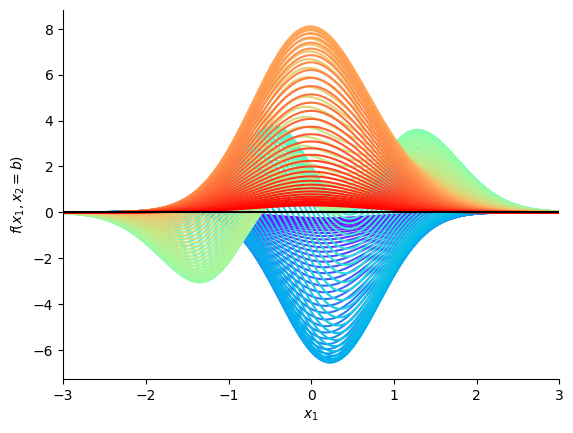

In [20]:
down_step=2

y_array_downsample=y_array[0::down_step]
fig,ax=plt.subplots()
colors=cm.rainbow(np.linspace(0,1,len(y_array_downsample)))

for i in np.linspace(1,len(y_array_downsample),len(y_array_downsample)):
    plt.plot(x_array,f_xy_zz[(int(i)-1)*down_step,:], #todo
             color=colors[int(i)-1])

plt.axhline(y=0,color='k',linestyle='-')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('$x_1$')
plt.ylabel('$f(x_1,x_2 = b)$')
ax.set_xlim(xx.min(), xx.max())

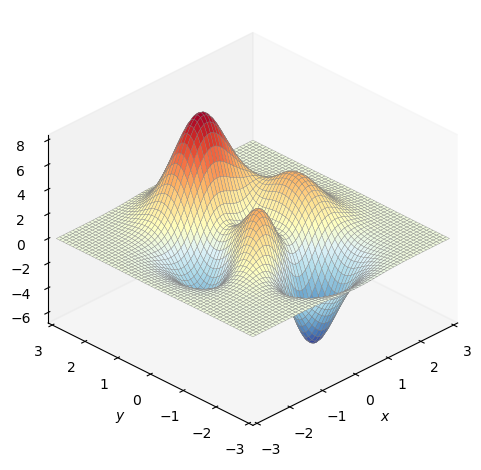

In [28]:
fig,ax=plt.subplots(subplot_kw={'projection':'3d'})

ax.plot_surface(xx,yy,f_xy_zz,cmap=cm.RdYlBu_r,
                rstride=5,cstride=5,linewidth=0.25,
                edgecolors=[0.5,0.5,0.5])
ax.set_proj_type('ortho')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

ax.set_xlim(xx.min(),xx.max())
ax.set_ylim(yy.min(),yy.max())
ax.view_init(azim=-135,elev=30)
ax.grid(False)
plt.tight_layout()

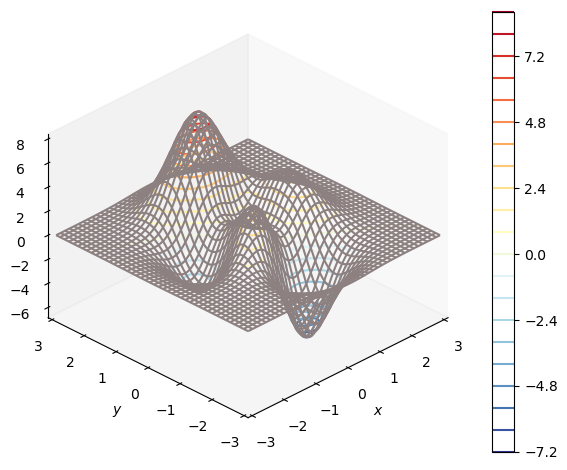

In [33]:
fig,ax=plt.subplots(subplot_kw={'projection':'3d'})

ax.plot_wireframe(xx,yy,f_xy_zz,color=[0.55,0.5,0.5])
colorbar=ax.contour(xx,yy,f_xy_zz,20,cmap='RdYlBu_r') #绘制等高线
fig.colorbar(colorbar,ax=ax)

ax.set_proj_type('ortho')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')
plt.tight_layout()
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.view_init(azim=-135, elev=30)
ax.grid(False)
plt.show()

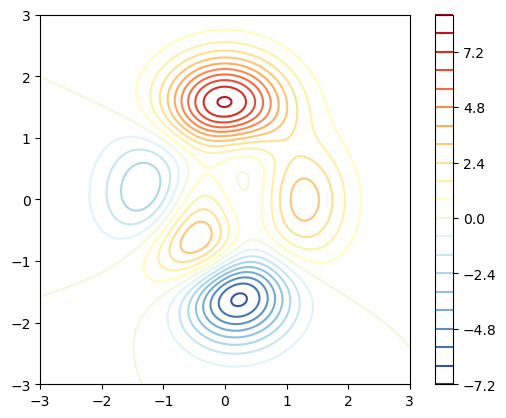

In [35]:
fig,ax=plt.subplots()

ax.contour(xx,yy,f_xy_zz,20,cmap='RdYlBu_r')
fig.colorbar(colorbar,ax=ax)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.gca().set_aspect('equal',adjustable='box')


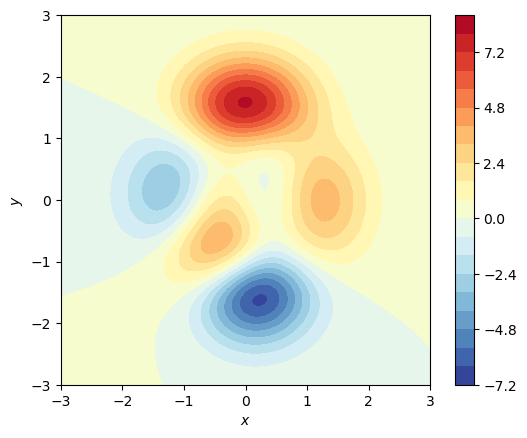

In [36]:
fig, ax = plt.subplots()

colorbar = ax.contourf(xx,yy, f_xy_zz, 20, cmap='RdYlBu_r')
fig.colorbar(colorbar, ax=ax)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# set_aspect() equal x和y比例相等,
# 如何调整子图的位置和大小以适应画布,子图的边界会扩展到画布的边缘，但画布中的空间将被均匀地填充。
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

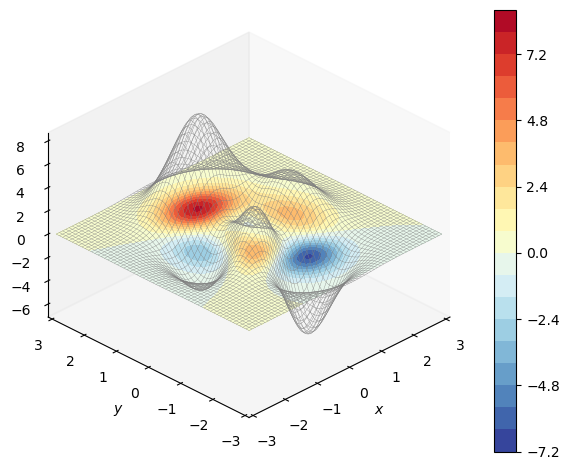

In [37]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx,yy, f_xy_zz, 
                  rstride=5, cstride=5,
                  color = [0.5,0.5,0.5],
                  linewidth = 0.25)

colorbar = ax.contourf(xx,yy, f_xy_zz, 
           levels = 20, zdir='z', \
            offset= 0, cmap='RdYlBu_r')

fig.colorbar(colorbar, ax=ax)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')
ax.set_proj_type('ortho')
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
ax.view_init(azim=-135, elev=30)
ax.grid(False)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
# ax.set_zlim(0, 0.7)
plt.tight_layout()

plt.show()